In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
PATH = "archives/"
filename = "nombres_dinosaurios.txt"

nombres = open(PATH + filename, "r").read().lower().replace("\n", ".")
vocabulario = sorted(list(set(nombres)))

len_datos, len_vocabulario = len(nombres), len(vocabulario)
print(f"Vocabulario: {''.join(vocabulario)}")
print(f"Longitud Datos: {len_datos} \tLongitud Vocabulario: {len_vocabulario}")

Vocabulario: .abcdefghijklmnopqrstuvwxyz
Longitud Datos: 19909 	Longitud Vocabulario: 27


In [3]:
def tokeniza(s):
  ret = [stoi[c] for c in s]
  return ret

def destokeniza(ltokens):
  ret = "".join([itos[i] for i in ltokens])
  return ret

stoi = {ch:i for i,ch in enumerate(vocabulario)}
itos = {i:ch for i,ch in enumerate(vocabulario)}
print(stoi, itos)

{'.': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26} {0: '.', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [4]:
N = np.zeros((len_vocabulario, len_vocabulario),dtype=np.int32)

# for i in range(len_vocabulario):
#   for j in range(len_vocabulario):
#     bigrama = itos[i] +itos[j]
#     N[i,j] = nombres.count(bigrama)

for i in range(len_datos-1):
  bigrama = nombres[i] + nombres[i+1]
  fila = stoi[nombres[i]]
  col = stoi[nombres[i+1]]
  N[fila,col] += 1
  
N

array([[   0,  165,   75,  109,   81,   65,   21,   61,   64,   24,   26,
          40,   82,   91,   48,   41,  125,   10,   40,  146,   99,   18,
          21,   17,   16,   24,   26],
       [ 138,   11,   24,  100,   36,   42,    6,   40,   17,   23,    5,
          20,  138,   68,  347,   22,   89,    3,  124,  171,  204,  791,
          30,    6,   12,   12,    8],
       [   0,   41,    2,    0,    3,   33,    0,    0,    0,   22,    0,
           0,    5,    0,    0,   17,    0,    0,   26,    2,    0,   14,
           0,    0,    0,    6,    0],
       [   0,   62,    0,    2,    0,  116,    0,    0,  166,   21,    0,
           2,   11,    0,    3,   84,    0,    0,   37,    2,   17,   16,
           0,    0,    0,    0,    0],
       [   1,   43,    0,    2,    1,   37,    0,    0,    4,   40,    0,
           0,    0,    3,    1,  129,    0,    0,   42,    2,    0,   11,
           0,    1,    0,   23,    1],
       [  14,   12,    4,   24,   13,    5,    2,   24,    6,   4

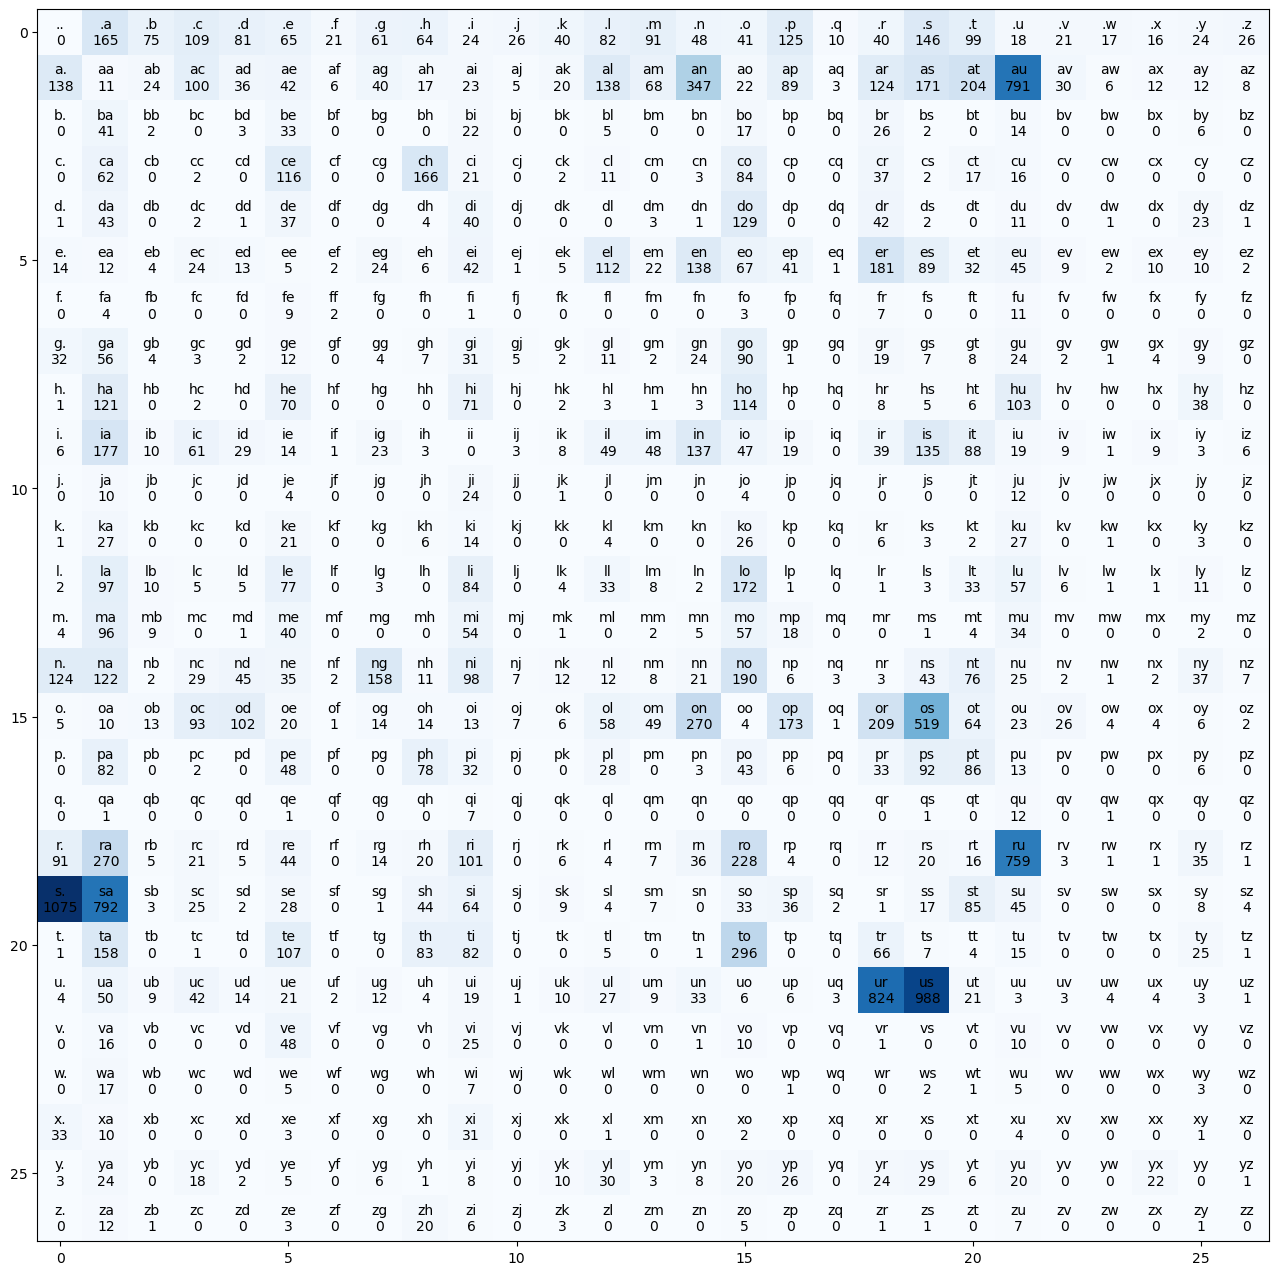

In [5]:
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for i in range(len_vocabulario):
  for j in range(len_vocabulario):
    bigrama = itos[i] +itos[j]
    txt = bigrama + "\n" + str(N[i,j])
    # plt.text(j,i,bigrama)
    plt.text(j, i, txt, ha="center", va="center")

In [6]:
N[0]/N[0].sum()

array([0.        , 0.10749186, 0.04885993, 0.07100977, 0.05276873,
       0.04234528, 0.01368078, 0.03973941, 0.04169381, 0.01563518,
       0.01693811, 0.02605863, 0.0534202 , 0.05928339, 0.03127036,
       0.0267101 , 0.08143322, 0.00651466, 0.02605863, 0.09511401,
       0.06449511, 0.01172638, 0.01368078, 0.01107492, 0.01042345,
       0.01563518, 0.01693811])

In [7]:
P = N.astype(float)/N.sum(axis=1, keepdims=True)
P

array([[0.00000000e+00, 1.07491857e-01, 4.88599349e-02, 7.10097720e-02,
        5.27687296e-02, 4.23452769e-02, 1.36807818e-02, 3.97394137e-02,
        4.16938111e-02, 1.56351792e-02, 1.69381107e-02, 2.60586319e-02,
        5.34201954e-02, 5.92833876e-02, 3.12703583e-02, 2.67100977e-02,
        8.14332248e-02, 6.51465798e-03, 2.60586319e-02, 9.51140065e-02,
        6.44951140e-02, 1.17263844e-02, 1.36807818e-02, 1.10749186e-02,
        1.04234528e-02, 1.56351792e-02, 1.69381107e-02],
       [5.54885404e-02, 4.42299960e-03, 9.65018094e-03, 4.02090873e-02,
        1.44752714e-02, 1.68878166e-02, 2.41254524e-03, 1.60836349e-02,
        6.83554483e-03, 9.24809007e-03, 2.01045436e-03, 8.04181745e-03,
        5.54885404e-02, 2.73421793e-02, 1.39525533e-01, 8.84599920e-03,
        3.57860877e-02, 1.20627262e-03, 4.98592682e-02, 6.87575392e-02,
        8.20265380e-02, 3.18053880e-01, 1.20627262e-02, 2.41254524e-03,
        4.82509047e-03, 4.82509047e-03, 3.21672698e-03],
       [0.00000000e+00

In [8]:
H = N.sum(axis=1)
H

array([1535, 2487,  171,  539,  341,  913,   37,  360,  548,  944,   55,
        141,  616,  328, 1081, 1710,  552,   23, 1704, 2285,  852, 2123,
        111,   41,   85,  266,   60])

In [9]:
H = N.sum(axis=1, keepdims=True)
H

array([[1535],
       [2487],
       [ 171],
       [ 539],
       [ 341],
       [ 913],
       [  37],
       [ 360],
       [ 548],
       [ 944],
       [  55],
       [ 141],
       [ 616],
       [ 328],
       [1081],
       [1710],
       [ 552],
       [  23],
       [1704],
       [2285],
       [ 852],
       [2123],
       [ 111],
       [  41],
       [  85],
       [ 266],
       [  60]])

In [10]:
z = P[0]
r = random.choices(range(27),weights=z, k=1)
r

[19]

In [11]:
random.seed(42)
for _ in range(10):
  salida = []
  ix = stoi["."]
  while True:
    z = P[ix]
    ix = random.choices(range(27), weights=z,  k=1)[0]
    salida.append(itos[ix])
    if ix == 0: break
  print("".join(salida))


oceloskapallalorchuaus.
buracorusaveptosaucemalanongamusais.
hyrusgomandeus.
piticephos.
cura.
bos.
anzhyuausamn.
jius.
lcrurus.
saus.


In [12]:
l = ["a", "b", "c"]
p = [0.8,0.1,0.1]
for _ in range(10):
    h = random.choices(l,p, k=1)
    print(h)

['a']
['a']
['c']
['b']
['b']
['a']
['a']
['b']
['c']
['a']


In [13]:
txt = nombres
log_likelihood = 0
for i in range(len(txt)-1):
  ch1 = txt[i];     i1 = stoi[ch1]
  ch2 = txt[i+1];   i2 = stoi[ch2]
  p = P[i1, i2]
  log_likelihood += np.log(p)
  print(f"{ch1}{ch2} -> {p}")
log_likelihood = log_likelihood/len(txt)
print(f"metrica nll: {-log_likelihood}")

aa -> 0.004422999597909127
ac -> 0.04020908725371934
ch -> 0.3079777365491651
he -> 0.12773722627737227
en -> 0.1511500547645126
no -> 0.1757631822386679
os -> 0.30350877192982456
sa -> 0.3466083150984683
au -> 0.31805388017692
ur -> 0.3881300047103156
ru -> 0.4454225352112676
us -> 0.46537918040508713
s. -> 0.47045951859956237
.a -> 0.10749185667752444
aa -> 0.004422999597909127
ar -> 0.049859268194611985
rd -> 0.0029342723004694834
do -> 0.3782991202346041
on -> 0.15789473684210525
ny -> 0.034227567067530065
yx -> 0.08270676691729323
x. -> 0.38823529411764707
.a -> 0.10749185667752444
ab -> 0.009650180940892641
bd -> 0.017543859649122806
da -> 0.12609970674486803
al -> 0.05548854041013269
ll -> 0.05357142857142857
la -> 0.15746753246753248
ah -> 0.006835544833132288
hs -> 0.009124087591240875
sa -> 0.3466083150984683
au -> 0.31805388017692
ur -> 0.3881300047103156
ru -> 0.4454225352112676
us -> 0.46537918040508713
s. -> 0.47045951859956237
.a -> 0.10749185667752444
ab -> 0.0096501809